In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import lightgbm as lgb

In [41]:
label = pd.read_csv('/Users/yangdongjae/Desktop/2020/대외활동/2020년 공공 빅데이터 청년 인턴십/실무형 프로젝트/roundabout_project/data/전국사고csv.csv', encoding = 'cp949')

In [42]:
label

,OBJT_ID,OCCU_YEAR,OCCU_MT,OCCU_DE,OCCU_TM,OCCU_DAY,OCCU_DATE,LCLAS,SCLAS,DEATH,...,DRNKG,KID,ODSN,WLKG,VIOLT_CN,CTPRVN_CD,SGG_CD,EMD_CD,X,Y
0,1,2016,2,27,16,토요일,20160227,경상사고,차대차,0,...,NaN,NaN,NaN,NaN,안전거리 미확보,11,11110,11110101,1.413422e+07,4.521789e+06
1,2,2016,2,28,19,일요일,20160228,중상사고,차대차,0,...,NaN,NaN,NaN,NaN,안전운전 의무 불이행,11,11110,11110101,1.413420e+07,4.521219e+06
2,3,2016,3,28,7,월요일,20160328,중상사고,차대차,0,...,NaN,NaN,NaN,NaN,안전거리 미확보,11,11110,11110101,1.413455e+07,4.521176e+06
3,4,2016,4,5,13,화요일,20160405,경상사고,차대차,0,...,NaN,NaN,O,NaN,안전운전 의무 불이행,11,11110,11110101,1.413401e+07,4.521163e+06
4,5,2016,5,15,19,일요일,20160515,경상사고,차대차,0,...,NaN,O,NaN,NaN,안전거리 미확보,11,11110,11110101,1.413422e+07,4.521177e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654354,654355,2018,12,15,16,토요일,20181215,경상사고,차대차,0,...,NaN,NaN,NaN,NaN,신호위반,50,50130,50130320,1.411856e+07,3.939567e+06
654355,654356,2018,12,15,23,토요일,20181215,경상사고,차대차,0,...,NaN,NaN,O,NaN,신호위반,50,50130,50130320,1.411837e+07,3.940935e+06
654356,654357,2018,12,18,18,화요일,20181218,중상사고,차대차,0,...,NaN,NaN,NaN,NaN,안전운전 의무 불이행,50,50130,50130320,1.411768e+07,3.938694e+06
654357,654358,2018,12,21,11,금요일,20181221,중상사고,차대사람,0,...,NaN,NaN,O,O,중앙선 침범,50,50130,50130320,1.411887e+07,3.938561e+06


In [61]:
label['total'] = label[['DEATH','SWPSN','SINJPSN','INJPSN']].sum(axis = 1)

In [43]:
label = label.drop(['X','Y'],axis = 1)

In [62]:
raw_x = label[['OCCU_MT','OCCU_DE','OCCU_TM','OCCU_DAY','OCCU_DATE']]
raw_y = label[['total']]

In [63]:
raw_x['OCCU_DAY'] = raw_x['OCCU_DAY'].astype('category')

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
raw_x['OCCU_DAY']

0         토요일
1         일요일
2         월요일
3         화요일
4         일요일
         ... 
654354    토요일
654355    토요일
654356    화요일
654357    금요일
654358    토요일
Name: OCCU_DAY, Length: 654359, dtype: category
Categories (7, object): [금요일, 목요일, 수요일, 월요일, 일요일, 토요일, 화요일]

In [65]:
train_x, test_x, train_y, test_y = train_test_split(raw_x, raw_y, test_size=0.2, random_state=42)

In [66]:
train_ds = lgb.Dataset(train_x, label = train_y)
test_ds = lgb.Dataset(test_x, label = test_y)

In [67]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [68]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.31011
[200]	valid_0's l2: 1.30944
[300]	valid_0's l2: 1.30946
Early stopping, best iteration is:
[255]	valid_0's l2: 1.30933


In [69]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [70]:
model = lgb.train(params , train_ds , 1000 , test_ds , verbose_eval = 100 , early_stopping_rounds = 100)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.31011
[200]	valid_0's l2: 1.30944
[300]	valid_0's l2: 1.30946
Early stopping, best iteration is:
[255]	valid_0's l2: 1.30933


In [71]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [72]:
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

In [73]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  1.309329561610868
R2 score:  0.006671023078466121


In [74]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [75]:
final_result.columns = ['label','predict']

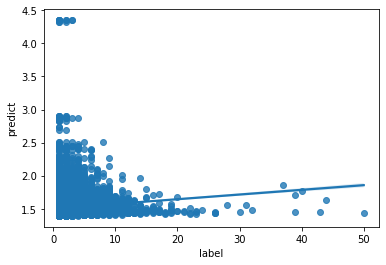

In [76]:
sns.regplot(x = 'label', y = 'predict', data = final_result)